In [1]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve

urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x10db3ac50>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [4]:
import pandas as pd

data = pd.read_csv("Fremont.csv")
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [5]:
import pandas as pd

data = pd.read_csv("Fremont.csv", index_col="Date")
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
10/03/2012 12:00:00 AM,9.0,4.0
10/03/2012 01:00:00 AM,6.0,4.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,3.0,2.0
10/03/2012 04:00:00 AM,1.0,6.0


In [6]:
import pandas as pd

data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


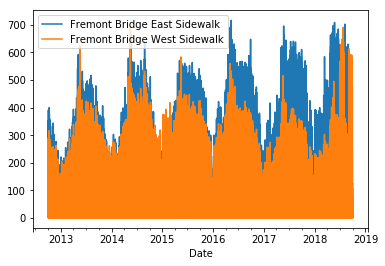

In [7]:
%matplotlib inline
data.plot()

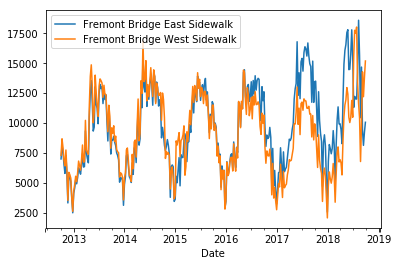

In [8]:
%matplotlib inline
# downsample into 1-week bins and sum values in each bin
data.resample('W').sum().plot()

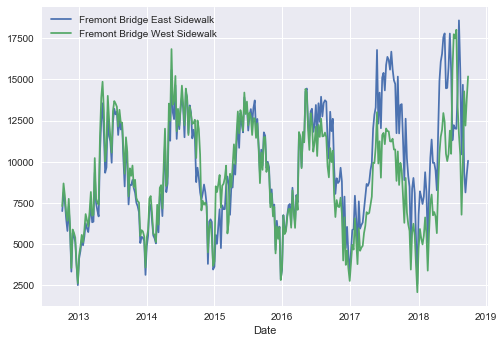

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.resample('W').sum().plot()

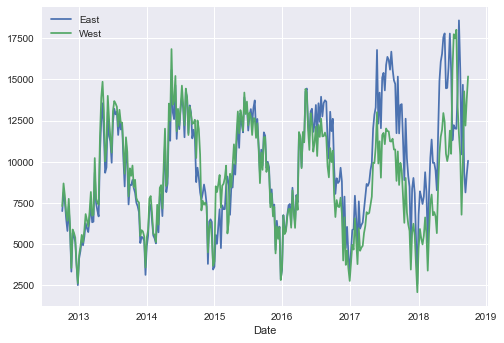

In [10]:
data.columns = ["East", "West"]

data.resample('W').sum().plot()

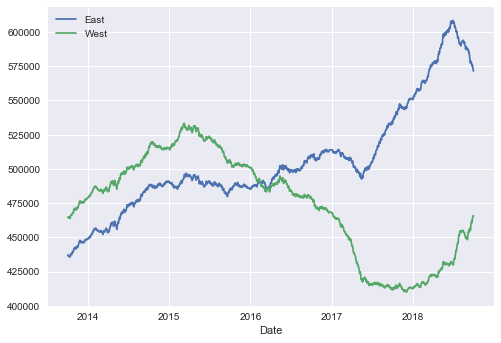

In [11]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 618365.35)

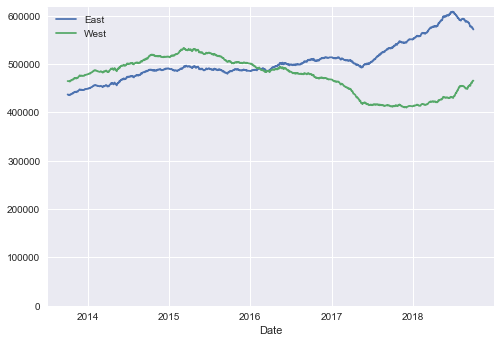

In [12]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

(0, 1080850.45)

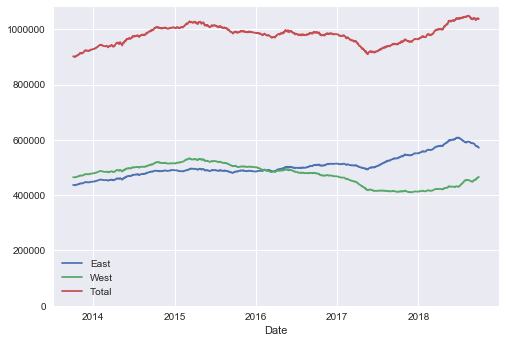

In [13]:
data["Total"] = data["West"] + data["East"]

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

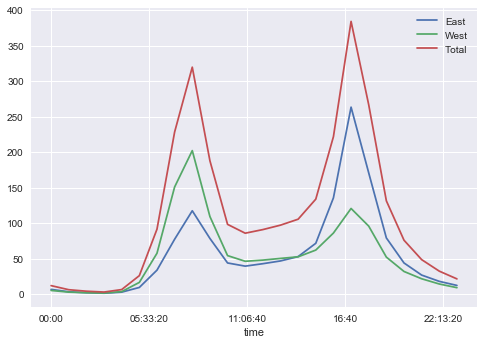

In [14]:
data.groupby(data.index.time).mean().plot()

In [15]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


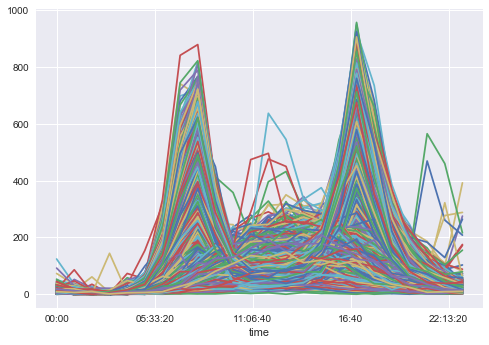

In [16]:
pivoted.plot(legend=False)

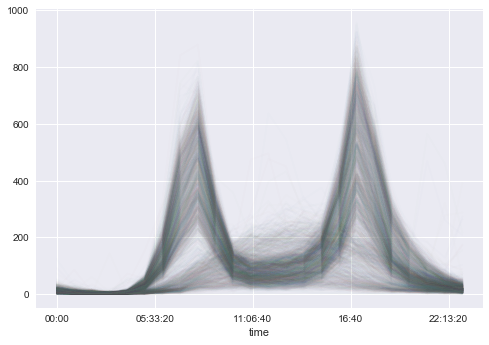

In [17]:
pivoted.plot(legend=False, alpha=0.01)

- Restart and run all
- create github repo w/ Python gitignore and MIT License